# Vehicle CO<sub>2</sub> Emission Prediction using Machine Learning

### "This model predicts CO<sub>2</sub> emissions based on engine size, cylinders, and fuel consumtion of various vehicle types."

In [20]:
import pandas as pd #type:ignore
from sklearn.model_selection import train_test_split #type:ignore
from sklearn.linear_model import LinearRegression #type:ignore
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #type:ignore

In [8]:
df=pd.read_csv("CO2_emission.csv")

In [9]:
print("Data Shape:", df.shape)
df.head()

Data Shape: (7385, 12)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [11]:
df=df.rename(columns={'Engine Size(L)': 'Engine_Size','Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption',
                      'CO2 Emissions(g/km)': 'CO2_Emissions'})

In [12]:
data = df[['Engine_Size', 'Cylinders', 'Fuel_Consumption', 'CO2_Emissions']]

In [13]:
X = data[['Engine_Size', 'Cylinders', 'Fuel_Consumption']]
y = data['CO2_Emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
pred = model.predict(X_test)

In [16]:
print("R² Score:", round(r2_score(y_test, pred), 3))
print("MAE:", round(mean_absolute_error(y_test, pred), 3))
print("MSE:", round(mean_squared_error(y_test, pred), 3))

R² Score: 0.877
MAE: 13.517
MSE: 421.922


In [17]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(compare.head())

      Actual   Predicted
7261     253  251.245501
4489     344  322.266949
1539     322  323.048201
3532     297  300.761531
6418     308  287.361973


In [22]:
# engine = 2.5
# cylinders = 6
# fuel = 9.0

engine = float(input("Enter Engine Size (L): "))
cylinders = int(input("Enter Cylinders: "))
fuel = float(input("Enter Fuel Consumption (L/100 km): "))

predicted = model.predict([[engine, cylinders, fuel]])
print(f"Estimated CO2 Emission: {predicted[0]:.2f} g/km")

Estimated CO2 Emission: 223.23 g/km


C:\Users\arpit\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


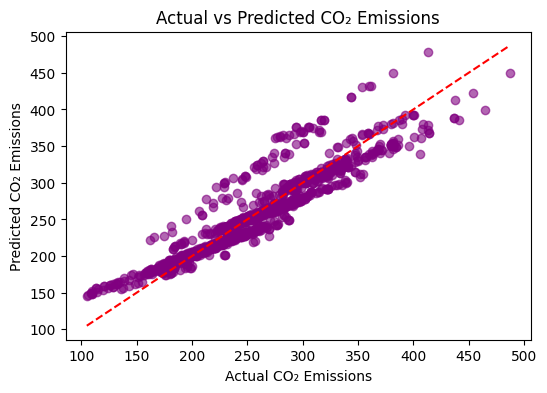

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, pred, color='purple', alpha=0.6)
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') #reference line
plt.show()